# Poisson 2D

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875]
N ->  16  | erro -> 0.012457838274481103


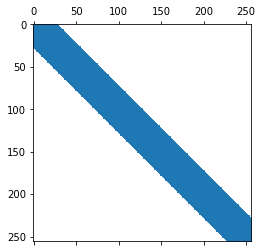

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve

def phi(x,y):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
def f(x,y):
    return -8*(np.pi**2)*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

def main():
    N = 16
    a = 0
    b = 1
    dx = (b-a)/N
    
    k = [np.ones(N-1),-2*np.ones(N),np.ones(N-1)]
    offset = [-1,0,1]
    A1 = diags(k,offset).toarray()
    
    A1[0][0] = A1[0][0] -1
    A1[N-1][N-1] = A1[N-1][N-1] -1
    
    I = np.eye(N)
    
    A = csr_matrix(np.kron(A1,I) + np.kron(I,A1))
    
    plt.figure(1)
    plt.spy(A)
    
    #PHIexata : um vetor de tamanho N^2
    #rhs: right hand side
    
    phiex = np.zeros(N**2)
    rhs = np.zeros(N**2)
    
    #x = np.linspace(a,b,N)
    #y = np.linspace(a,b,N)
    x = np.zeros(N)
    y= np.zeros(N)
    for i in range(N):
        x[i] = a + (i+0.5)*dx
        y[i] = a + (i+0.5)*dx
    
    for j in range(N):
        for i in range(N):
            phiex[i+j*N] = phi(x[i],y[j])
            rhs[i+j*N] = (dx**2)*f(x[i],y[j])
    
    for i in range(N):
        rhs[i] = rhs[i] + 2*phi(x[i],a)
        rhs[N**2 - 1 - i] = rhs[N**2 - 1 - i] + 2*phi(x[N-1-i], b)
    for j in range(N):
        rhs[j*N] = rhs[j*N] + 2*phi(a,y[j])
        rhs[(N-1)+j*N] = rhs[(N-1)+j*N] + 2*phi(b,y[j])
    
    phiaprox = spsolve(A,rhs)
    print(x)
    err = np.zeros(N**2)
    for i in range(N**2):
        err[i] = np.abs(phiex[i] - phiaprox[i])
    #print(err,"\n")
    #print("N =", N, "| err ->", np.linalg.norm(err, ord = np.inf))
    print("N -> ", N, " | erro ->", err.max())
    
main()

# Erro Poisson 2D - Convergência

Razão entre os erros convergindo para $2^x$ onde x = 2, ordem do método

In [7]:
#N = 8 | err -> 0.045263328185220164
#N = 16 | err -> 0.012457838274481103
#N = 32 | err -> 0.0031880386905250857
#N = 64 | err -> 0.0008016429562909266
#N = 128 | err -> 0.00020070086036605428

e = np.zeros(4)
e[0] = 0.045263328185220164/0.012457838274481103
e[1] = 0.012457838274481103/0.0031880386905250857
e[2] = 0.0031880386905250857/0.0008016429562909266
e[3] = 0.0008016429562909266/0.00020070086036605428

print(e)

[3.63332122 3.90768102 3.97688106 3.99421784]
